# 6.2 Exploring Relationships

## Contents list:


#### 01 Importing libraries
#### 02 Importing data
#### 03 Exploring Relationships  (Correlation, Scatterplot, Pair Plot, Categorical Plots)



#### 01 Importing libraries

In [1]:
# Step 1 - Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

#### 02 Importing data

In [2]:
# Project folder path as string
path = r'C:\Users\User\Desktop\Chocolate Bar Ratings'

In [3]:
# Step 1 - Import data - Import chocolate_checked.csv data set using the os library
df_c= pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'chocolate_checked.csv'), index_col = False)

In [4]:
# Checking the number of rows and columns
df_c.shape

(1721, 9)

In [5]:
df_c.head()

,Unnamed: 0,company,specific_bean_origin_or_bar_name,reference_number,review_date,cocoa_percent,company_location,rating,broad_bean_origin
0,0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,Sao Tome
1,1,A. Morin,Kpime,1676,2015,0.70,France,2.75,Togo
2,2,A. Morin,Atsane,1676,2015,0.70,France,3.00,Togo
3,3,A. Morin,Akata,1680,2015,0.70,France,3.50,Togo
4,4,A. Morin,Quilla,1704,2015,0.70,France,3.50,Peru


In [6]:
# Dropping the Unnamed: 0 column from df_c dataframe
df_c=df_c.drop(columns = ['Unnamed: 0'])

In [7]:
# Checking the number of rows and columns
df_c.shape

(1721, 8)

In [8]:
df_c.head()

,company,specific_bean_origin_or_bar_name,reference_number,review_date,cocoa_percent,company_location,rating,broad_bean_origin
0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,Sao Tome
1,A. Morin,Kpime,1676,2015,0.70,France,2.75,Togo
2,A. Morin,Atsane,1676,2015,0.70,France,3.00,Togo
3,A. Morin,Akata,1680,2015,0.70,France,3.50,Togo
4,A. Morin,Quilla,1704,2015,0.70,France,3.50,Peru


#### 03 Exploring Relationships

In [9]:
# Checking for data types
df_c.dtypes

company                              object
specific_bean_origin_or_bar_name     object
reference_number                      int64
review_date                           int64
cocoa_percent                       float64
company_location                     object
rating                              float64
broad_bean_origin                    object
dtype: object

###### Correlations

In [10]:
#Step 3 - Creating correlation matrix using pandas library
df_c.corr()

,reference_number,review_date,cocoa_percent,rating
reference_number,1.000000,0.985266,0.038406,0.080073
review_date,0.985266,1.000000,0.040437,0.075401
cocoa_percent,0.038406,0.040437,1.000000,-0.146180
rating,0.080073,0.075401,-0.146180,1.000000


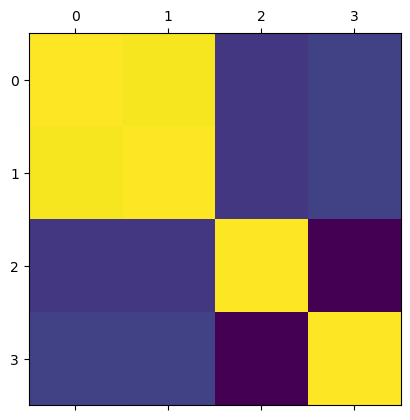

In [11]:
# Step 3 - Creating correlation heatmap using matplotlib library
plt.matshow(df_c.corr())
plt.show()

In [ ]:
# Save figure
plt.matshow(df_c.corr())
plt.savefig('out.png') 


Text(0.5, 1.0, 'Correlation Matrix')

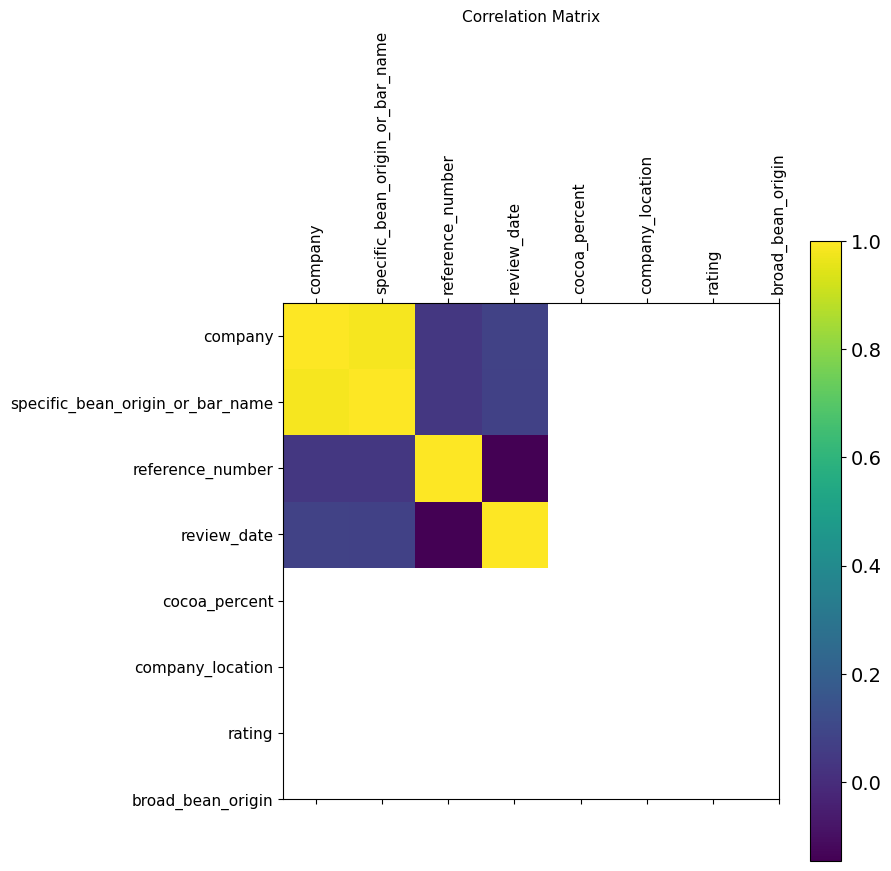

In [13]:
# Adding labels, legend, and change the size of the heatmap
f=plt.figure(figsize=(8, 8)) # figure size
plt.matshow(df_c.corr(),fignum=f.number) # type of plot
plt.xticks(range(df_c.shape[1]), df_c.columns, fontsize=11, rotation=90) # x axis labels
plt.yticks(range(df_c.shape[1]), df_c.columns, fontsize=11) # y axis labels
cb=plt.colorbar() # add a coloe legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=11) # add title

In [14]:
# Checking column names
df_c.columns

Index(['company', 'specific_bean_origin_or_bar_name', 'reference_number',
       'review_date', 'cocoa_percent', 'company_location', 'rating',
       'broad_bean_origin'],
      dtype='object')

In [15]:
# Create a subset excluding review_date
df_1=df_c[['company', 'specific_bean_origin_or_bar_name', 'reference_number', 'cocoa_percent', 'company_location', 'rating',
       'broad_bean_origin']]

In [16]:
df_1

,company,specific_bean_origin_or_bar_name,reference_number,cocoa_percent,company_location,rating,broad_bean_origin
0,A. Morin,Agua Grande,1876,0.63,France,3.75,Sao Tome
1,A. Morin,Kpime,1676,0.70,France,2.75,Togo
2,A. Morin,Atsane,1676,0.70,France,3.00,Togo
3,A. Morin,Akata,1680,0.70,France,3.50,Togo
4,A. Morin,Quilla,1704,0.70,France,3.50,Peru
...,...,...,...,...,...,...,...
1716,Zotter,Peru,647,0.70,Austria,3.75,Peru
1717,Zotter,Congo,749,0.65,Austria,3.00,Congo
1718,Zotter,Kerala State,749,0.65,Austria,3.50,India
1719,Zotter,Kerala State,781,0.62,Austria,3.25,India


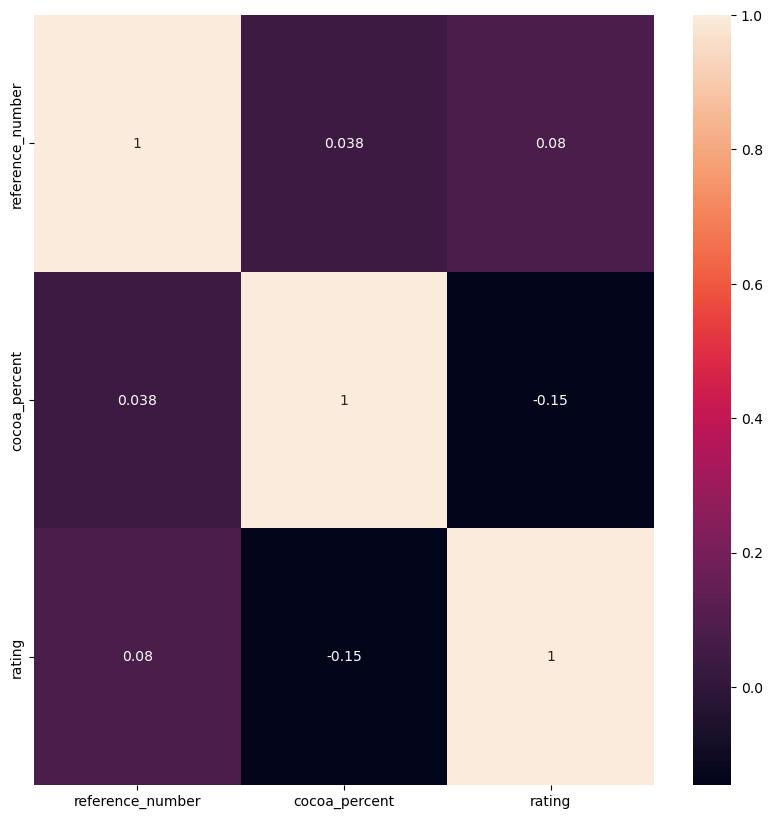

In [17]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_1.corr(), annot = True, ax = ax) # The 'annot' argument allows the plot to place the correlation coefficients onto the heatmap.

- It can be observed that the correlations among the variables are weak.

##### Scatterplots

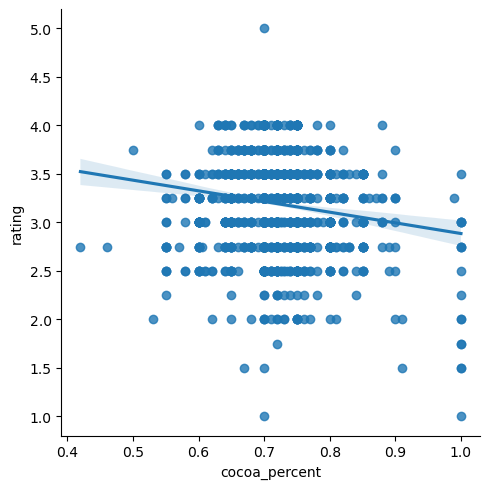

In [18]:
# Step 4 - Create a scatterplot for the 'cocoa_percent' and 'rating' columns in seaborn

sns.lmplot(x = 'cocoa_percent', y = 'rating', data = df_c)

- It can be observed that the correlations among the variables 'cocoa_percent' and 'rating' is slight negative. It is interesting to note that there is not a single rating for less than 40% cocoa and that the presence of cocoa from 60 to 80% is most rated with ratings from 2 to 4.


###### Pair Plots

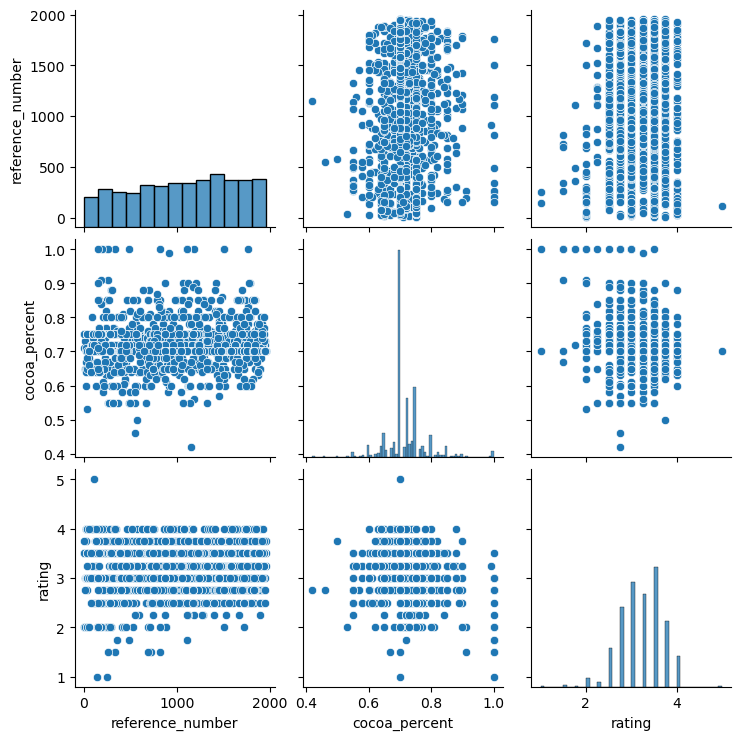

In [19]:
# Step 5 - Create a pair plot 

g = sns.pairplot(df_1)

- Pair plot shows the numerical variables (except for the 'review_date' variable). Through this exercise, the variables 'cocoa_percent' and 'rating' will be explored.

###### Categorical Plots

<AxesSubplot:xlabel='cocoa_percent', ylabel='Count'>

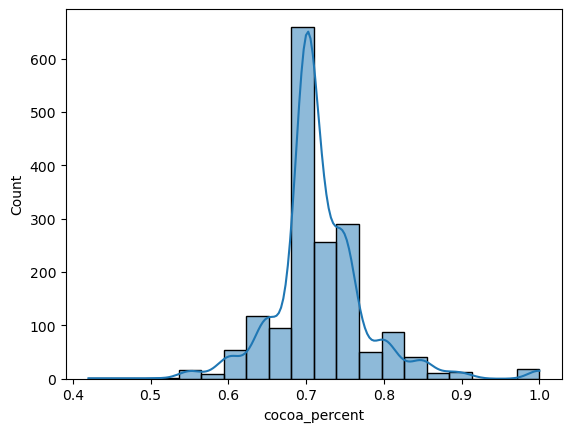

In [20]:
# Creating a categorical variable that splits the 'cocoa_percent' column into categories
# Creating a histogram to visualize the distribution of the variables 
sns.histplot(df_c['cocoa_percent'], bins = 20, kde = True)

In [21]:
df_c.loc[df_c['cocoa_percent'] < 0.65, 'cocoa_percent_category'] = 'Low_cocoa_percentage'

In [22]:
df_c.loc[(df_c['cocoa_percent'] >= 0.65) & (df_c['cocoa_percent'] < 0.77), 'cocoa_percent_category'] = 'Middle_cocoa_percentage'

In [23]:
df_c.loc[df_c['cocoa_percent'] >= 0.77, 'cocoa_percent_category'] = 'High_cocoa_percentage'

In [24]:
df_c['cocoa_percent_category'].value_counts(dropna = False)

Middle_cocoa_percentage    1377
High_cocoa_percentage       219
Low_cocoa_percentage        125
Name: cocoa_percent_category, dtype: int64

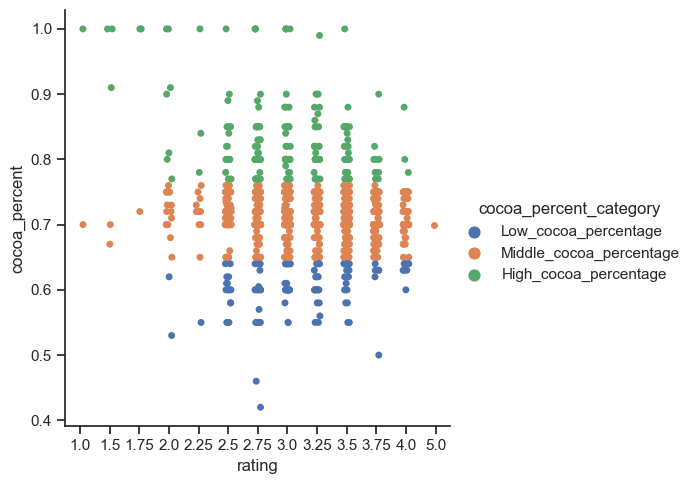

In [25]:
# Step 6 - Create a categorical plot in seaborn using the cocoa percent categories created above

sns.set(style='ticks')
g = sns.catplot(x='rating', y='cocoa_percent', hue='cocoa_percent_category', data=df_c)

In [26]:
# Save figure
g.savefig('out1.png') 

- It can be noticed that the low presence of the percentage of cocoa in chocolates for 2 entries received a rating of about 2.75, while a couple of chocolates with a percentage of cocoa of 100% received a ratings of 1, 1,5, and 1,75. The highest number of chocolate bars has  rating of 2 to 4 and contains about 70% cocoa.

- Step 7 - Answers:

- Based on the exploration conducted so far, it can be observed that the correlation among the variables 'cocoa_percent' and 'rating' are slight negative (-0,15). - See output 17 and 18.

In [27]:
# The countries that produce the highest-rated bars can be observed through the 'company_location' variable.
df_c1=df_c.groupby(['company_location'])['rating'].max()
df_c1=df_c1.sort_values(ascending=False)
df_c1.head(15)

company_location
Italy                       5.0
France                      4.0
United States of America    4.0
Madagascar                  4.0
Australia                   4.0
Scotland                    4.0
Guatemala                   4.0
Spain                       4.0
Germany                     4.0
Switzerland                 4.0
United Kingdom              4.0
Ecuador                     4.0
Sao Tome                    4.0
Colombia                    4.0
Belgium                     4.0
Name: rating, dtype: float64

- Countries that produce the highest-rated bars are listed in previous output, top 10 countries are: Italy, France, United States of America, Madagascar, Australia, Scotland, Guatemala, Spain, Germany, and Switzerland.

In [28]:
# Countries that produce chocolate bars with the highest percentage of cocoa
df_c2=df_c.groupby(['company_location']).agg('cocoa_percent').max()
df_c2=df_c2.sort_values(ascending=False)
df_c2.head()

company_location
New Zealand                 1.0
Ecuador                     1.0
Italy                       1.0
Canada                      1.0
United States of America    1.0
Name: cocoa_percent, dtype: float64

In [29]:
# Countries that produce chocolate bars with the lowest percentage of cocoa
df_c3=df_c.groupby('company_location').agg('cocoa_percent').min()
df_c3=df_c3.sort_values(ascending=True)
df_c3.head()

company_location
Martinique                  0.42
Colombia                    0.46
Brazil                      0.50
Peru                        0.55
United States of America    0.55
Name: cocoa_percent, dtype: float64

In [30]:
# Average rating per country
df_c4=df_c.groupby('company_location').agg('rating').mean()
df_c4=df_c4.sort_values(ascending=False)
df_c4.head(15)

company_location
Chile          3.750000
Philippines    3.500000
Netherlands    3.500000
Poland         3.500000
Iceland        3.416667
Vietnam        3.409091
Brazil         3.397059
Switzerland    3.392857
Australia      3.380435
Canada         3.350427
Guatemala      3.350000
Singapore      3.333333
Scotland       3.325000
Spain          3.309524
Argentina      3.305556
Name: rating, dtype: float64

In [31]:
# The most common rating by company location
df_c5=df_c.groupby('rating').agg('company_location').value_counts(dropna=False)
df_c5=df_c5.sort_values(ascending=False)


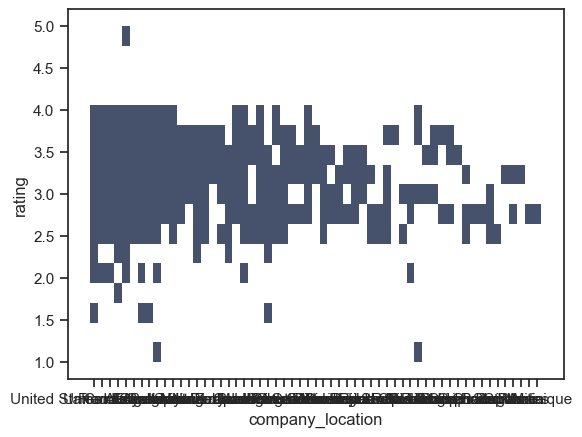

In [32]:
# Create histogram - most often rating
histogram=sns.histplot(data=df_c5, x='company_location', y='rating')

- It can be observed that the most common rating by the company’s location is from about 2.4 to 4.

In [33]:
# Exporting df_c dataframe as "exploring_relationships.csv" in "Prepared Data" folder.
df_c.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'exploring_relationships.csv'))